# The basics 

## Introduction

Python gives powerful tools for data analysis - among the main ones we find [Polars](https://www.pola.rs/), which gives fast and flexible data structures, especially for interactive data analysis.

In this first part of the tutorial we will see:

* filtering and transformation operations on Polars dataframes
* plotting with MatPlotLib
* Examples with AstroPi dataset
* Exercises with  meteotrentino and other datasets

## Check installation

First let's see if you have already installed Polars on your system, try executing this cell with `Ctrl Enter`:

In [94]:
import polars as pl


If you saw no error messages, you can skip installation, otherwise do this:

* Anaconda - open Anaconda Prompt and issue this:

`conda install polars`

* Without Anaconda (`--user` installs in your home):

`python3 -m pip install --user polars`

## A dataframe?

A dataframe is basically a table, that is a collection of columns, also called `Series`, which all contain the same number of cells -- meaning they're all of the same height. Generally, each row can be thought of as corresponding to one unit of study (one measurement, one individual, one geographical area, you name it), while columnn correspond to a specific attribute, or variable (name, size, age, description, creation date...). 

![](img/dataframe.png)

In Polars, each column has a specific type (integer, string, date, but also list or dictionary!), similarly to NumPy arrays. And similarly to NumPy arrays, they can take "null" values in certain rows, to represent an absence of data.

But how to create one in practice? Let's start with a simple example. The concept of a DataFrame is materialised in Polars in the `DataFrame` class, which we can instantiate (create) simply as follows:

In [95]:
pl.DataFrame()

shape: (0, 0)
┌┐
╞╡
└┘

Not much to be seen here, because we didn't pass it any data!

```{admonition} Question
Before running the cells below, try to guess what their output will look like. What are the column names? The values in each row?
```

Let's add some data in the form of a dictionary of lists:

In [96]:
df = pl.DataFrame(
    {
        "name": ["Alice", "Bob"],
        "age": [78, None],
    },
    orient="col",
)
df

name,age
str,i64
"""Alice""",78
"""Bob""",null


Or, equivalently, with a list of dictionaries:

In [97]:
df = pl.DataFrame(
    [
        {"name": "Alice", "age": 78},
        {"name": "Bob"},
    ],
    orient="row",
)
df

name,age
str,i64
"""Alice""",78
"""Bob""",null


```{admonition} Question
In the second case, adding the `null` entry enables Polars to comply with an important property of dataframes. Which one?
```

```{admonition} Answer
:class: tip dropdown

That columns -- or, equivalently, the rows -- should all have the same number of cells!
```

## 2. Ingesting data


In most cases, you actually want to deal with an existing dataset, that you'd like to analyse.
For this course, let's try analyzing data recording protests from around the globe, [collected as part of the Mass Mobilization project](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HTTWYL). No need to download anything, the data are already in the repository in the form of a CSV file. So let's read our data, using `pl.read_csv`:

In [98]:
protests = pl.read_csv("data/protests.csv")
protests

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…"
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…"
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,"""500""","""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …"
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,"""100s""","""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…"
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,"""950""","""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9102017002,"""Papua New Guinea""",910,2017,"""Oceania""",1,2,15,7,2017,15,7,2017,1,"""Mount Hagen""","""50-99""","""50+""","""protesters opposed to counting…","""political behavior, process""",null,null,null,"""crowd dispersal""",null,null,null,null,null,null,"""violence, chaos and fraud: fra…"
9102017003,"""Papua New Guinea""",910,2017,"""Oceania""",1,3,31,10,2017,31,10,2017,0,"""Lorengau""","""100-999""","""About 100""","""locals""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""refugees dig in as camp closes…"
9102018000,"""Papua New Guinea""",910,2018,"""Oceania""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Here it is!

Note that here, we dealt with a simple, well-formatted file. In the wild (aka, "the Internet"), you will not always meet such well-behaved data though. In that case you'll probably need to specify one of the (many) arguments of `read_csv` that you can see below:

In [105]:
%pinfo pl.read_csv

Signature:
pl.read_csv(
    source: 'str | Path | IO[str] | IO[bytes] | bytes',
    *,
    has_header: 'bool' = True,
    columns: 'Sequence[int] | Sequence[str] | None' = None,
    new_columns: 'Sequence[str] | None' = None,
    separator: 'str' = ',',
    comment_prefix: 'str | None' = None,
    quote_char: 'str | None' = '"',
    skip_rows: 'int' = 0,
    schema: 'SchemaDict | None' = None,
    schema_overrides: 'Mapping[str, PolarsDataType] | Sequence[PolarsDataType] | None' = None,
    null_values: 'str | Sequence[str] | dict[str, str] | None' = None,
    missing_utf8_is_empty_string: 'bool' = False,
    ignore_errors: 'bool' = False,
    try_parse_dates: 'bool' = False,
    n_threads: 'int | None' = None,
    infer_schema_length: 'int | None' = 100,
    batch_size: 'int' = 8192,
    n_rows: 'int | None' = None,
    encoding: 'CsvEncoding | str' = 'utf8',
    low_memory: 'bool' = False,
    rechunk: 'bool' = False,
    use_pyarrow: 'bool' = False,
    storage_options: 'dict[str, A

```{note}
You can obtain the same output with the shortcut `pl.read_csv?`, try it! This works for any function or class, so it's extremely useful! Use it whenever you forget the arguments of a function. This is what is called an [IPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html), recognisable by the starting `%`. You may use them in an IPython session or Jupyter cell, but not in the basic Python interpreter (when you call `python`)!
```

Not all data are in CSV format (and they shouldn't, it's a very slow-to-read and heavy file format!), so Polars provides a number of other functions to ingest data. They are all in the form `pl.read_<file-format>(path)`. Symmetrically, to write from a `DataFrame` to a file, the equivalent `.write_<file-format>(path)` are available.

![](img/pl_input_output.png)

## Taking a glimpse

The one DataFrame method you will probably use the most is `.head()`. It allows you to see the first 5 rows of the DataFrame, which is very useful to have a quick look at its current state:

In [70]:
protests.head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…",1990-01-15,1990-01-15,1d
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…",1990-06-25,1990-06-25,1d
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,"""500""","""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …",1990-07-01,1990-07-01,1d
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,"""100s""","""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…",1990-07-12,1990-09-06,57d
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,"""950""","""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…",1990-08-14,1990-08-15,2d


```{note}
In the rest of the course, whenever we wish to show the result of some computation, we'll append `.head()` to these computations to limit the size of the output. Remember to remove it if you wish to get the full result!
```

Also, you can get the list of column names using the `.columns` attribute:

In [56]:
protests.columns

['id',
 'country',
 'ccode',
 'year',
 'region',
 'protest',
 'protestnumber',
 'startday',
 'startmonth',
 'startyear',
 'endday',
 'endmonth',
 'endyear',
 'protesterviolence',
 'location',
 'participants_category',
 'participants',
 'protesteridentity',
 'protesterdemand1',
 'protesterdemand2',
 'protesterdemand3',
 'protesterdemand4',
 'stateresponse1',
 'stateresponse2',
 'stateresponse3',
 'stateresponse4',
 'stateresponse5',
 'stateresponse6',
 'stateresponse7',
 'sources']

And the shape of the frame (number of rows and columns) using `.shape`:

In [57]:
protests.shape

(17145, 30)

Finally, you can take a quick glimpse at it, featuring the two pieces of info we got above, plus the data types and a few values with `.glimpse()`:

In [58]:
protests.glimpse()

Rows: 17145
Columns: 30
$ id                    <i64> 201990001, 201990002, 201990003, 201990004, 201990005, 201990006, 201991001, 201991002, 201992001, 201993001
$ country               <str> 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada'
$ ccode                 <i64> 20, 20, 20, 20, 20, 20, 20, 20, 20, 20
$ year                  <i64> 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1992, 1993
$ region                <str> 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America'
$ protest               <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ protestnumber         <i64> 1, 2, 3, 4, 5, 6, 1, 2, 1, 1
$ startday              <i64> 15, 25, 1, 12, 14, 19, 10, 28, 4, 16
$ startmonth            <i64> 1, 6, 7, 7, 8, 9, 9, 9, 5, 5
$ startyear             <i64> 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1992, 1993
$ endday          

## 6. Operations on columns

Let's see now how to select, add and transform columns.

### 6.1 Selecting columns

If we want a subset of columns, we pass the name of each column to `.select()`:

In [59]:
protests.select('id', 'country', 'year').head()  

id,country,year
i64,str,i64
201990001,"""Canada""",1990
201990002,"""Canada""",1990
201990003,"""Canada""",1990
201990004,"""Canada""",1990
201990005,"""Canada""",1990
…,…,…
9102017002,"""Papua New Guinea""",2017
9102017003,"""Papua New Guinea""",2017
9102018000,"""Papua New Guinea""",2018


```{note}
This does not change the original DataFrame, to save your selection, you need to assign to a new variable!
```

### 6.2 Selecting and modifying

Selecting columns is nice, but once they are selected, we will certainly want to do something with them, right? Like, how can we modify the values in them?

But before going into that, let's see a slightly different way of selecting columns. The previous code is actually equivalent to:

In [60]:
protests.select(pl.col("id", "country", "year")).head()

id,country,year
i64,str,i64
201990001,"""Canada""",1990
201990002,"""Canada""",1990
201990003,"""Canada""",1990
201990004,"""Canada""",1990
201990005,"""Canada""",1990
…,…,…
9102017002,"""Papua New Guinea""",2017
9102017003,"""Papua New Guinea""",2017
9102018000,"""Papua New Guinea""",2018


But why bother calling `pl.col()` here, and what does it even do? To answer these questions, for now let's go back to our data and the glimpse we had above. See the `protesterviolence` column, that, as far as we can see, is only filled with zeros and ones? Would be nice to check if it's actually the case, because if it is, each value in this column can probably be treated as a boolean telling us whether part of the protesters used violence.

Well this can simply be done by selecting the column with `pl.col()`, and then calling the `.unique()` method on it, as follows:

In [61]:
protests.select(pl.col("protesterviolence").unique())

protesterviolence
i64
null
0
1


Turns out we do only have zeros and ones, save some nulls that denote an absence of data.

```{note}
Putting zeros and ones to encode a boolean is actually a pretty common practice, you might come across this again!
```

```{note}
It is usually better to start reading any documentation you can find about the dataset before making tests like these. In some situations though, there is no documentation, so you _have to_ make this kind of tests to validate assumptions as much as you can.
```

We can therefore safely transform this integer column into a boolean one, using the `.cast()` method, and (optionally) renaming it using `.alias()`:

In [62]:
protests.select(pl.col("protesterviolence").cast(bool).alias("There was protester violence")).head()

There was protester violence
bool
false
false
false
true
true
…
true
false
null


````{admonition} Question
Why does the following code have absolutely no chance of producing the desired behaviour?

```python
protests.select("protesterviolence".cast(bool))
```
````


```{admonition} Answer
:class: tip dropdown

Because `"protesterviolence"` is a string, and the `cast` method is not defined on strings. And even if it was, this string object does not hold the data inside the column, it is just a string, so no string method could ever transform the data inside the column! That's why this `pl.col()` abstraction exists: its methods allows us to access column data from the DataFrame under consideration.
```

### 6.2 - Adding columns

To keep existing columns and add new ones, the `.with_columns()` method will come in handy. Let's try to get the duration in days of all the protests in our dataset. First let's find out what columns could help us here:

In [74]:
protests.head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…",1990-01-15,1990-01-15,1d
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…",1990-06-25,1990-06-25,1d
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,"""500""","""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …",1990-07-01,1990-07-01,1d
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,"""100s""","""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…",1990-07-12,1990-09-06,57d
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,"""950""","""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…",1990-08-14,1990-08-15,2d


It does seem that the start and end day of each protest are each encoded in 3 columns of integers, respectively: `["startyear", "startmonth", "startday"]`, and `["endyear", "endmonth", "endday"]`. This makes it very annoying to compute the duration of protests, because for instance if a protest spans more than a month, we can't just subtract `"endday"` with `"startday"`, which are day numbers within their month. So let's first compute two new columns for the start and end date, with an actual `date` data type, which will save us a headache. Here we'll use the `pl.date()` function:

In [75]:
protests = protests.with_columns(
    pl.date("startyear", "startmonth", "startday").alias("start_date"),
    pl.date("endyear", "endmonth", "endday").alias("end_date"),
)
protests.head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…",1990-01-15,1990-01-15,1d
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…",1990-06-25,1990-06-25,1d
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,"""500""","""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …",1990-07-01,1990-07-01,1d
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,"""100s""","""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…",1990-07-12,1990-09-06,57d
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,"""950""","""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…",1990-08-14,1990-08-15,2d


And now we just have to subtract `"start_date"` from `"end_date"` to get our duration! There is one small problem though. As you can see from the result above, when a protest occurred over one day, the `start_date` and `end_date` are identical. There is a simple solution though: we can add a duration of one day to every entry by adding `pl.duration(days=1)`. That works exactly like adding a scalar to a NumPy array: the value is added to each element. 

In [76]:
protests = protests.with_columns(
    duration=pl.col("end_date") - pl.col("start_date") + pl.duration(days=1)
)
protests.head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…",1990-01-15,1990-01-15,1d
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…",1990-06-25,1990-06-25,1d
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,"""500""","""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …",1990-07-01,1990-07-01,1d
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,"""100s""","""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…",1990-07-12,1990-09-06,57d
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,"""950""","""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…",1990-08-14,1990-08-15,2d


```{note}
Here we gave our column a name through the name of the keyword argument passed to `with_columns`. This is just another way to `.alias()`.
```

### 6.2.1 Exercise: Meteo temperature in Fahrenheit 

In `meteo` dataframe, create a column `Temp (Fahrenheit)` with the temperature measured in Fahrenheit degrees.

Formula to calculate conversion from Celsius degrees (C):


$Fahrenheit = \frac{9}{5}C + 32$

In [ ]:
# write here



In [ ]:
# SOLUTION
meteo['Temp (Fahrenheit)'] = meteo['Temp']* 9/5 + 32 
meteo.head()


       **************  SOLUTION OUTPUT  **************


,Date,Pressure,Rain,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54


### 6.2.2 Exercise - Pressure vs Temperature

Pressure should be directly proportional to temperature in a closed environment [Gay-Lussac's law](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law):

$\frac{P}{T} = k$

Does this holds true for `meteo` dataset? Try to find out by direct calculation of the formula and compare with `corr()` method results.

In [ ]:
# SOLUTION
#jupman-purge-output

# as expected, in an open environment there is not much linear correlation
print(meteo.corr())
meteo['Pressure'] / meteo['Temp']

                   Pressure      Rain      Temp  Temp (Fahrenheit)
Pressure           1.000000 -0.270345 -0.214149          -0.214149
Rain              -0.270345  1.000000  0.025227           0.025227
Temp              -0.214149  0.025227  1.000000           1.000000
Temp (Fahrenheit) -0.214149  0.025227  1.000000           1.000000


0        184.333333
1        165.916667
2        168.728814
3        184.388889
4        187.867925
           ...     
2873    4900.000000
2874    1960.400000
2875    1633.666667
2876    4902.500000
2877   -3268.666667
Length: 2878, dtype: float64

## 4. Operations on rows

If we consider the rows of a dataset, typically we may wish to select only some of them, change their order or add some new rows.

### 4.1. Selecting by row numbers

The simplest way to select only certain rows is through their corresponding number, i.e., their vertical position in the frame. 

For instance, you can select the first two or the three last rows in the corresponding following ways:

In [14]:
protests.head(2)

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,"""1000s""","""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…"
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…"


In [15]:
protests.tail(3)

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
9102018000,"""Papua New Guinea""",910,2018,"""Oceania""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
9102019000,"""Papua New Guinea""",910,2019,"""Oceania""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,""".""",null,null,null,null,""".""",null,null,null
9102020000,"""Papua New Guinea""",910,2020,"""Oceania""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


```{note}
As shown earlier, if you call `.head()` or `.tail()` without any argument, they will show you 5 rows.
```

It's also possible to select contiguous rows by using _slicing_, as we already did for [strings](https://en.softpython.org/strings/strings2-sol.html#Slices) and [lists](https://en.softpython.org/lists/lists2-sol.html#Slices) TODO

For example, here we select two rows starting from the fifth (_included_):

In [16]:
protests.slice(5, 2)

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
201990006,"""Canada""",20,1990,"""North America""",1,6,19,9,1990,19,9,1990,0,"""Kahnawake Reservation near Mon…",null,"""200""","""mohawk indians""","""police brutality""",null,null,null,"""crowd dispersal""","""shootings""",null,null,null,null,null,"""1. mohawks tear gassed in clas…"
201991001,"""Canada""",20,1991,"""North America""",1,1,10,9,1991,17,9,1991,0,"""national""",null,"""110000""","""public service alliance of can…","""labor wage dispute""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. mulroney acts to crush stri…"


### 4.2 Selecting rows fulfilling some conditions

Selecting by row numbers is simple, but most of the time you do not know in which position the relevant rows are, as their relevance depends on one or more specific conditions.
So let's see now how to filter data according to a condition they should satisfy.

This can be done using the `.filter()` method of DataFrames. As argument, it takes an expression evaluated for each row. All rows for which the expression evaluates to `True` are then kept.

So, for instance, to only keep rows corresponding to protests that happened in Italy:

In [69]:
protests.filter(pl.col("country") == "Italy").head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
3251990001,"""Italy""",325,1990,"""Europe""",1,1,13,7,1990,13,7,1990,1,"""Sicilian town of Ribera""","""100-999""","""> 50""","""farmers""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""sicilians riot over water shor…",1990-07-13,1990-07-13,1d
3251991001,"""Italy""",325,1991,"""Europe""",1,1,6,6,1991,6,6,1991,0,"""the Italian port of Brindisi""","""100-999""","""hundreds""","""albanians""","""political behavior, process""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""refugees riot. the times. june…",1991-06-06,1991-06-06,1d
3251991002,"""Italy""",325,1991,"""Europe""",1,2,22,10,1991,22,10,1991,0,"""major cities""","""5000-10000""","""Thousands ""","""people""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. italians strike to protest …",1991-10-22,1991-10-22,1d
3251992001,"""Italy""",325,1992,"""Europe""",1,1,28,6,1992,28,6,1992,0,"""Palermo""",""">10000""","""100000""","""people""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. anti mafia protest. the was…",1992-06-28,1992-06-28,1d
3251992002,"""Italy""",325,1992,"""Europe""",1,2,21,7,1992,21,7,1992,0,"""Milan, Rome,Palermo, and in ot…",""">10000""","""> 15000""","""people and police officers""","""political behavior, process""",null,null,null,"""ignore""","""beatings""",null,null,null,null,null,"""1. sicilians jeer italian lead…",1992-07-21,1992-07-21,1d


Notice here the usage of `pl.col()` that we've seen earlier! Again, this allows us to access the values contained in a column, here to make an equality test and return a boolean.

And again, as seen previously when we computed the protests' durations, values from different columns can be compared. To illustrate that, here below we'll select all protests that spanned more than one calendar year:

In [68]:
protests.filter(pl.col("startyear") != pl.col("endyear")).head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
701991004,"""Mexico""",70,1991,"""North America""",1,4,23,11,1991,15,1,1992,0,"""Tabasco to Mexico City""",null,"""100s""","""democratic revolutionary party…","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. the washington post, mexica…",1991-11-23,1992-01-15,54d
1001994005,"""Colombia""",100,1994,"""South America""",1,5,22,12,1994,11,1,1995,0,"""southern Colombia""",null,"""5000""","""putumayo peasant movement""","""political behavior, process""",null,null,null,"""accomodation""","""killings""","""crowd dispersal""",null,null,null,null,"""xinhua news agency, january 3,…",1994-12-22,1995-01-11,21d
1011996013,"""Venezuela""",101,1996,"""South America""",1,13,27,12,1996,15,1,1997,0,"""national level""",null,"""50""","""health workers""","""labor wage dispute""",null,null,null,"""ignore""",null,null,null,null,null,null,"""the associated press, january …",1996-12-27,1997-01-15,20d
1012002010,"""Venezuela""",101,2002,"""South America""",1,10,3,12,2002,4,2,2003,0,"""national level""",null,"""10000""","""workers""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""the washington post, december …",2002-12-03,2003-02-04,64d
1012004016,"""Venezuela""",101,2004,"""South America""",1,16,16,12,2004,22,1,2005,0,"""national level 4 different pr…",null,"""2500""","""inmates""","""political behavior, process""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""associated press worldstream, …",2004-12-16,2005-01-22,38d


It's possible to combine conditions like we already did in [Numpy filtering](https://en.softpython.org/matrices-numpy/matrices-numpy1-sol.html#Filtering): for example by using the special operator conjunction `&` :

In [86]:
protests.filter(
    (pl.col("country") == "Italy")
    & (pl.col("year") == 1992)
)

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
3251992001,"""Italy""",325,1992,"""Europe""",1,1,28,6,1992,28,6,1992,0,"""Palermo""",""">10000""","""100000""","""people""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. anti mafia protest. the was…",1992-06-28,1992-06-28,1d
3251992002,"""Italy""",325,1992,"""Europe""",1,2,21,7,1992,21,7,1992,0,"""Milan, Rome,Palermo, and in ot…",""">10000""","""> 15000""","""people and police officers""","""political behavior, process""",null,null,null,"""ignore""","""beatings""",null,null,null,null,null,"""1. sicilians jeer italian lead…",1992-07-21,1992-07-21,1d
3251992003,"""Italy""",325,1992,"""Europe""",1,3,3,10,1992,3,10,1992,1,"""Rome""","""100-999""","""hundreds""","""left wing italian demonstrator…","""political behavior, process""",null,null,null,"""beatings""","""crowd dispersal""",null,null,null,null,null,"""police attack rome rioters. th…",1992-10-03,1992-10-03,1d
3251992004,"""Italy""",325,1992,"""Europe""",1,4,13,10,1992,13,10,1992,0,"""Across Italy""",""">10000""","""millions""","""workers""","""political behavior, process""",null,null,null,"""ignore""","""accomodation""",null,null,null,null,null,"""1. millions in italy march in …",1992-10-13,1992-10-13,1d
3251992005,"""Italy""",325,1992,"""Europe""",1,5,26,10,1992,26,10,1992,0,"""Rome""",""">10000""","""10000""","""shopkeepers""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""italy shopowners protest tax p…",1992-10-26,1992-10-26,1d
3251992006,"""Italy""",325,1992,"""Europe""",1,6,16,12,1992,16,12,1992,0,"""Rome""",""">10000""","""20000""","""doctors""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""rome doctors demonstrate to pr…",1992-12-16,1992-12-16,1d


### 4.3 Sorting

To obtain a NEW dataframe sorted according to one or more columns, we can use the `.sort()` method: 

In [85]:
protests.sort(by='duration', descending=True).head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201998000,"""Canada""",20,1998,"""North America""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
201999000,"""Canada""",20,1999,"""North America""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
202001000,"""Canada""",20,2001,"""North America""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
202002000,"""Canada""",20,2002,"""North America""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
202004000,"""Canada""",20,2004,"""North America""",0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Oops, that gives us only rows with a `null` duration, let's put them last!

In [ ]:
protests.sort(by='duration', descending=True, nulls_last=True).head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
6002011005,"""Morocco""",600,2011,"""MENA""",1,5,1,7,2011,24,1,2014,0,"""Imider""","""50-99""",""">50""","""protesters, students, locals, …","""political behavior, process""","""price increases, tax policy""",null,null,"""killings""",null,null,null,null,null,null,"""on moroccan hill, villagers ma…",2011-07-01,2014-01-24,939d
7502014011,"""India""",750,2014,"""Asia""",1,11,3,6,2014,3,6,2016,1,"""Jawahar Bagh, a public garden …","""2000-4999""","""About 2,000 people""","""a group that was calling for h…","""political behavior, process""","""price increases, tax policy""",null,null,"""crowd dispersal""","""killings""","""shootings""",null,null,null,null,"""24 killed as armed protesters …",2014-06-03,2016-06-03,732d
3502013013,"""Greece""",350,2013,"""Europe""",1,13,22,7,2013,11,5,2015,0,"""Athens""","""100-999""","""100s""","""state paid cleaning ladies""","""labor wage dispute""",null,null,null,"""accomodation""",null,null,null,null,null,""".""","""germany urges greece to vote o…",2013-07-22,2015-05-11,659d
6522011003,"""Syria""",652,2011,"""MENA""",1,3,18,3,2011,3,12,2012,1,"""National""",null,"""10000s """,null,"""political behavior, process""","""removal of politician""","""police brutality""",null,"""killings""","""shootings""","""beatings""","""crowd dispersal""","""arrests""","""accomodation""",null,"""security forces restrained as …",2011-03-18,2012-12-03,627d
1552016001,"""Chile""",155,2016,"""South America""",1,1,15,5,2016,17,5,2017,0,"""Chiloe Island""","""50-99""",""">50""","""fishermen""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. toxic red tide in chile pro…",2016-05-15,2017-05-17,368d


### 4.4  Exercise - Meteo stats

✪ Analyze data from  Dataframe ```meteo``` to find:

* values of average pression, minimal and maximal
* average temperature
* the dates of rainy days

In [42]:
# write here
print("Average pressure : %s" % meteo.Pressure.values.mean())
print("Minimal pressure : %s" % meteo.Pressure.values.min())
print("Maximal pressure : %s" % meteo.Pressure.values.max())
print("Average temperature : %s" % meteo.Temp.values.mean())
meteo[(meteo.Rain > 0)]

Average pressure : 986.3408269631689
Minimal pressure : 966.3
Maximal pressure : 998.3
Average temperature : 6.410701876302988


,Date,Pressure,Rain,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


### 4.5 Exercise - meteo plot

✪ Put in a plot the temperature from  dataframe _meteo:_


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# write here



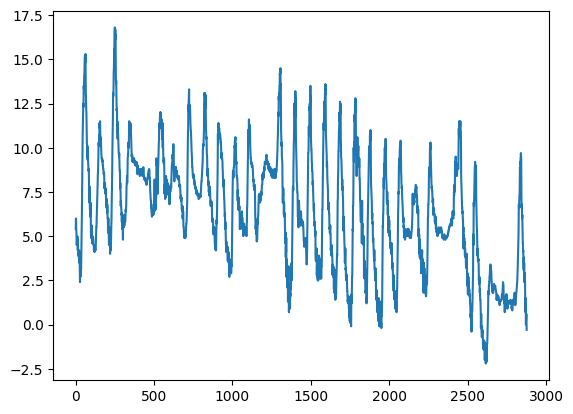

In [44]:
# SOLUTION
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

meteo.Temp.plot()
plt.show()


### 4.6 Exercise - Meteo pressure and raining

✪ In the same plot as above show the pressure and amount of raining.



In [45]:
# write here


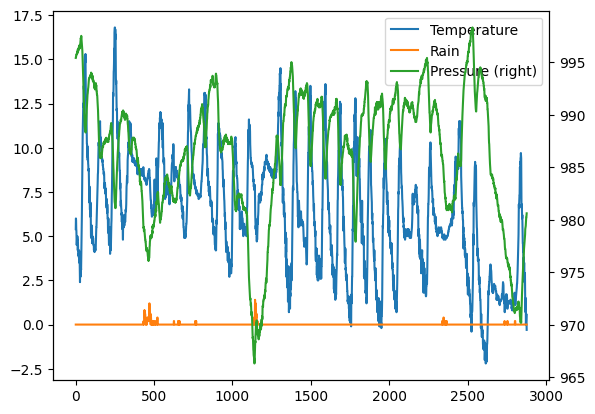

In [46]:
# SOLUTION

meteo.Temp.plot(label="Temperature", legend=True)
meteo.Rain.plot(label="Rain", legend=True)
meteo.Pressure.plot(secondary_y=True, label="Pressure", legend=True);
plt.show()

## 5. Operations on strings

To perform operations on `string` columns, we need to use the `.str` accessor after selecting the right column. This gives you access to a number of methods, some similar to known Python method to manipulate strings, some not. For more details see [the documentation](https://docs.pola.rs/api/python/stable/reference/expressions/string.html)


### 5.1 Filter by textual values

When we want to filter by text values, we can use `.str.contains`, here for example we select all the protests in which the source article mentioned a "riot":

In [93]:
protests.filter(pl.col("sources").str.contains("riot")).head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201992001,"""Canada""",20,1992,"""North America""",1,1,4,5,1992,5,5,1992,1,"""Toronto""",null,"""1000""","""gangs of black and white youth…","""police brutality""",null,null,null,"""arrests""",null,null,null,null,null,null,"""1. window smashing and looting…",1992-05-04,1992-05-05,2d
202008001,"""Canada""",20,2008,"""North America""",1,1,10,8,2008,10,8,2008,1,"""Montreal, Quebec""",null,"""100s""","""unspecified""","""police brutality""",null,null,null,"""crowd dispersal""",null,null,null,null,null,null,"""1. canada: rioting in montreal…",2008-08-10,2008-08-10,1d
202012001,"""Canada""",20,2012,"""North America""",1,1,10,2,2012,6,6,2012,1,"""Quebec""",null,"""1000s""","""university students""","""price increases, tax policy""",null,null,null,"""crowd dispersal""","""arrests""",null,null,null,null,null,"""1. quebec plans to suspend cla…",2012-02-10,2012-06-06,118d
401994001,"""Cuba""",40,1994,"""North America""",1,1,5,8,1994,5,8,1994,1,"""Havana""",null,"""1000""","""unspecified""","""political behavior, process""",null,null,null,"""arrests""",null,null,null,null,null,null,"""1. protesters battle police in…",1994-08-05,1994-08-05,1d
411995002,"""Haiti""",41,1995,"""North America""",1,2,23,11,1995,23,11,1995,1,"""Cite Soleil""",null,"""50""","""residents of cite soleil""","""police brutality""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. fatal clashes in haiti slum…",1995-11-23,1995-11-23,1d


### 5.2 Extracting strings

We can also use it, for instance, to extract a rough estimate of the number of participants as an integer, as follows:

In [92]:
protests.with_columns(pl.col('participants').str.extract("([0-9]+)").cast(int)).head()

id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,start_date,end_date,duration
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,date,date,duration[ms]
201990001,"""Canada""",20,1990,"""North America""",1,1,15,1,1990,15,1,1990,0,"""national""",null,1000,"""unspecified""","""political behavior, process""","""labor wage dispute""",null,null,"""ignore""",null,null,null,null,null,null,"""1. great canadian train journe…",1990-01-15,1990-01-15,1d
201990002,"""Canada""",20,1990,"""North America""",1,2,25,6,1990,25,6,1990,0,"""Montreal, Quebec""",null,1000,"""unspecified""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. autonomy s cry revived in q…",1990-06-25,1990-06-25,1d
201990003,"""Canada""",20,1990,"""North America""",1,3,1,7,1990,1,7,1990,0,"""Montreal, Quebec""",null,500,"""separatist parti quebecois""","""political behavior, process""",null,null,null,"""ignore""",null,null,null,null,null,null,"""1. quebec protest after queen …",1990-07-01,1990-07-01,1d
201990004,"""Canada""",20,1990,"""North America""",1,4,12,7,1990,6,9,1990,1,"""Montreal, Quebec""",null,100,"""mohawk indians""","""land farm issue""",null,null,null,"""accomodation""",null,null,null,null,null,null,"""1. indians gather as siege int…",1990-07-12,1990-09-06,57d
201990005,"""Canada""",20,1990,"""North America""",1,5,14,8,1990,15,8,1990,1,"""Montreal, Quebec""",null,950,"""local residents""","""political behavior, process""",null,null,null,"""crowd dispersal""","""arrests""","""accomodation""",null,null,null,null,"""1. dozens hurt in mohawk block…",1990-08-14,1990-08-15,2d


```{note}
`"([0-9]+)"` is a regular expression. A whole course could be dedicated to them, so for now, you should just know that this particular one extracts any sequence of integers from a string. They are a very practical tool, so I wanted to make you aware of their existence, but thisyou don't need to know more than that for this course.
```

```{note}
There is a bunch of other data types with a special accessor, but we won't cover them here
```

## 7. Other exercises

### 7.1 Exercise - Air pollutants

Let's try analzying the hourly data from air quality monitoring stations from Autonomous Province of Trento.

Source: [dati.trentino.it](https://dati.trentino.it/dataset/qualita-dell-aria-rilevazioni-delle-stazioni-monitoraggio)

#### 7.1.1 - load the file

✪ Load the file [aria.csv](aria.csv) in pandas 

**IMPORTANT 1**: put the dataframe into the variable `aria`, so not to confuse it with the previous datasets.

**IMPORTANT 2**: use encoding `'latin-1'` 
(otherwise you might get weird load errors according to your operating system)

**IMPORTANT 3**: if you also receive other strange errors, try adding the parameter
`engine=python`

In [71]:

# write here

import polars as pd
import numpy as np 

# remember the encoding !
aria = pl.read_csv('aria.csv', encoding='latin-1')
aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


#### 7.1.2 - pollutants average

✪ find the average of `PM10` pollutants  at `Parco S. Chiara` (average on all days). You should obtain the value `11.385752688172044`

In [72]:
# write here

aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')].Valore.values.mean()

11.385752688172044

In [73]:
#jupman-purge-io
aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')]

,Stazione,Inquinante,Data,Ora,Valore,Unità di misura
0,Parco S. Chiara,PM10,2019-05-04,1,17.0,µg/mc
1,Parco S. Chiara,PM10,2019-05-04,2,19.0,µg/mc
2,Parco S. Chiara,PM10,2019-05-04,3,17.0,µg/mc
3,Parco S. Chiara,PM10,2019-05-04,4,15.0,µg/mc
4,Parco S. Chiara,PM10,2019-05-04,5,13.0,µg/mc
...,...,...,...,...,...,...
739,Parco S. Chiara,PM10,2019-06-03,20,33.0,µg/mc
740,Parco S. Chiara,PM10,2019-06-03,21,40.0,µg/mc
741,Parco S. Chiara,PM10,2019-06-03,22,31.0,µg/mc
742,Parco S. Chiara,PM10,2019-06-03,23,31.0,µg/mc


In [74]:
#jupman-purge-io
aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]


,Stazione,Inquinante,Data,Ora,Valore,Unità di misura
72,Parco S. Chiara,PM10,2019-05-07,1,7.0,µg/mc
73,Parco S. Chiara,PM10,2019-05-07,2,9.0,µg/mc
74,Parco S. Chiara,PM10,2019-05-07,3,10.0,µg/mc
75,Parco S. Chiara,PM10,2019-05-07,4,9.0,µg/mc
76,Parco S. Chiara,PM10,2019-05-07,5,12.0,µg/mc
77,Parco S. Chiara,PM10,2019-05-07,6,16.0,µg/mc
78,Parco S. Chiara,PM10,2019-05-07,7,19.0,µg/mc
79,Parco S. Chiara,PM10,2019-05-07,8,20.0,µg/mc
80,Parco S. Chiara,PM10,2019-05-07,9,18.0,µg/mc
81,Parco S. Chiara,PM10,2019-05-07,10,12.0,µg/mc



#### 7.1.3 - PM10 chart

✪ Use `plt.plot` as seen in a [previous example](#Matplotlib-plots-from-pandas-datastructures) (so by directly passing the relevant Pandas series), show in a chart the values of `PM10` during May 7h, 2019.

In [75]:
# write here



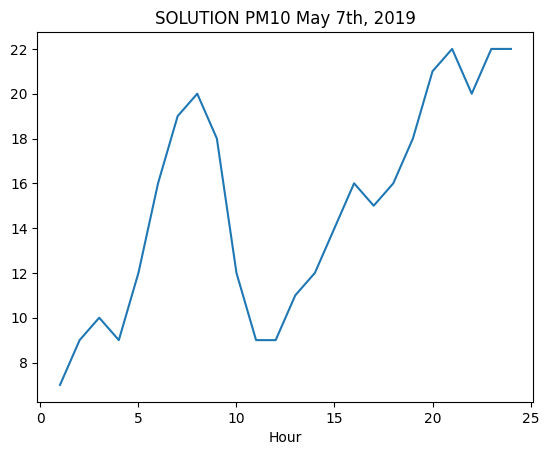

In [76]:
# SOLUTION

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

filtered = aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]

plt.plot(filtered['Ora'], filtered['Valore'] )
plt.title('SOLUTION PM10 May 7th, 2019')
plt.xlabel('Hour')
plt.show()

### 7.2 Exercise - Game of Thrones

Open with Pandas the file [game-of-thrones.csv](game-of-thrones.csv) which holds episodes from various years.

- use  `UTF-8` encoding
- **IMPORTANT**: place the dataframe into the variable `game`, so not to confuse it with previous dataframes

Data source:  [Kaggle](https://www.kaggle.com/datasets/bakar31/game-of-thronesgot) - License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

#### 7.2.1 Exercise - fan

You are given a dictionary `favorite` with the most liked episodes of a group of people, who unfortunately don't remember exactly the various titles which are often incomplete: Select the favorite episodes of Paolo and Chiara.

- assume the capitalization in `favorite` is the correct one
- **NOTE**: the dataset contains insidious double quotes around the titles, but if you write the code in the right way it shouldn't be a problem

In [77]:

import polars as pd
import numpy as np    

favorite = {
    "Paolo" : 'Winter Is',
    "Chiara" : 'Wolf and the Lion',
    "Anselmo" : 'Fire and',
    "Letizia" : 'Garden of'
}


# write here
game = pl.read_csv('game-of-thrones.csv', encoding='UTF-8')

titoliprotests = game[  (game["Title"].str.contains(favorite['Paolo'])) | (game["Title"].str.contains(favorite['Chiara']))] 

titoliprotests

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


#### 7.2.2  Esercise - first airing

Select all the episodes which have been aired the first time in a given `year` (`Original air date` column)

- **NOTE**: `year` is given as an `int`

In [78]:
year = 17

# write here
anniprotests = game[ game['Original air date'].str[-2:] == str(year)  ]
anniprotests

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
61,62,2,7,"""Stormborn""",Mark Mylod,Bryan Cogman,Outline from A Dream of Spring and original co...,23-Jul-17,9.27,8.9
62,63,3,7,"""The Queen's Justice""",Mark Mylod,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,30-Jul-17,9.25,9.2
63,64,4,7,"""The Spoils of War""",Matt Shakman,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,6-Aug-17,10.17,9.8
64,65,5,7,"""Eastwatch""",Matt Shakman,Dave Hill,Outline from A Dream of Spring and original co...,13-Aug-17,10.72,8.8
65,66,6,7,"""Beyond the Wall""",Alan Taylor,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,20-Aug-17,10.24,9.0
66,67,7,7,"""The Dragon and the Wolf""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,27-Aug-17,12.07,9.4


### 7.3 Exercise -  Healthcare facilities 

✪✪ Let's examine the dataset [SANSTRUT001.csv](SANSTRUT001.csv) which contains the healthcare facilities of Trentino region, and for each tells the type of assistance it offers (clinical activity, diagnostics, etc), the code and name of the communality where it is located.


Data source: [dati.trentino.it](https://dati.trentino.it/dataset/strutture-sanitarie-dell-azienda-sanitaria-e-convenzionate) Licenza: [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it)

Write a function which takes as input a town code and a text string, opens the file **with pandas** (encoding UTF-8) and:

1. PRINTS also the number of found rows
2. RETURNS a dataframe with selected only the rows having that town code and which contain the string in the column `ASSISTENZA`. The returned dataset must have only the columns 
`STRUTTURA`, `ASSISTENZA`, `COD_COMUNE`, `COMUNE`. 

In [79]:
import polars as pd   
import numpy as np    

def strutsan(cod_comune, assistenza):
    #jupman-raise
    print('***** SOLUTION')    
    struprotests = pl.read_csv('SANSTRUT001.csv', encoding='UTF-8')    
    res = struprotests[((struprotests['COD_COMUNE'] == cod_comune) & struprotests['ASSISTENZA'].str.contains(assistenza))]    
    
    print("Found", res.shape[0], "facilities")
    return res[ ['STRUTTURA', 'ASSISTENZA', 'COD_COMUNE', 'COMUNE']  ]
    #/jupman-raise


In [80]:
strutsan(22050, '')  # no ASSISTENZA filter

***** SOLUTION
Found 6 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
0,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
1,PRESIDIO OSPEDALIERO DI CAVALESE,DIAGNOSTICA STRUMENTALE E PER IMMAGINI,22050,CAVALESE
2,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` DI LABORATORIO,22050,CAVALESE
3,CENTRO SALUTE MENTALE CAVALESE,ASSISTENZA PSICHIATRICA,22050,CAVALESE
4,CENTRO DIALISI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
5,CONSULTORIO CAVALESE,ATTIVITA` DI CONSULTORIO MATERNO-INFANTILE,22050,CAVALESE


In [81]:
strutsan(22205, 'CLINICA')

***** SOLUTION
Found 16 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
59,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
62,CENTRO DIALISI TRENTO,ATTIVITA` CLINICA,22205,TRENTO
63,POLIAMBULATORI S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
64,PRESIDIO OSPEDALIERO VILLA IGEA,ATTIVITA` CLINICA,22205,TRENTO
73,OSPEDALE CLASSIFICATO S.CAMILLO,ATTIVITA` CLINICA,22205,TRENTO
84,NEUROPSICHIATRIA INFANTILE - UONPI 1,ATTIVITA` CLINICA,22205,TRENTO
87,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` CLINICA,22205,TRENTO
90,CENTRO SERVIZI SANITARI,ATTIVITA` CLINICA,22205,TRENTO
93,PSICOLOGIA CLINICA,ATTIVITA` CLINICA,22205,TRENTO
122,"ASSOCIAZIONE TRENTINA SCLEROSI MULTIPLA, ONLUS",ATTIVITA` CLINICA,22205,TRENTO


In [82]:
strutsan(22205, 'LABORATORIO')

***** SOLUTION
Found 5 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
61,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` DI LABORATORIO,22205,TRENTO
85,LABORATORI ADIGE SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
86,LABORATORIO DRUSO SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
89,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` DI LABORATORIO,22205,TRENTO
92,CENTRO SERVIZI SANITARI,ATTIVITA` DI LABORATORIO,22205,TRENTO
